# Mod17 Matploblib Plots

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [3]:
%matplotlib inline
#%matplotlib notebook

### Line plot
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.plot.html

In [4]:
np.random.seed(123456)
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2000', periods=1000))
ts.head(5)

2000-01-01    0.469112
2000-01-02   -0.282863
2000-01-03   -1.509059
2000-01-04   -1.135632
2000-01-05    1.212112
Freq: D, dtype: float64

In [5]:
ts = ts.cumsum()

In [6]:
ts.head(5)

2000-01-01    0.469112
2000-01-02    0.186249
2000-01-03   -1.322810
2000-01-04   -2.458442
2000-01-05   -1.246330
Freq: D, dtype: float64

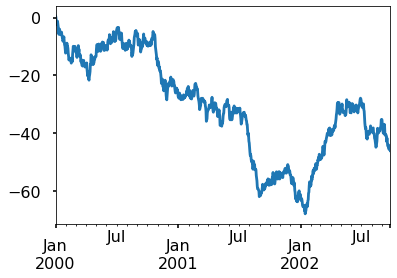

In [7]:
ts.plot.line();

In [8]:
df = pd.DataFrame({
    'name':['john','mary','peter','jeff','bill','lisa','jose'],
    'age':[23,78,22,19,45,33,20],
    'gender':['M','F','M','M','M','F','M'],
    'state':['california','dc','california','dc','california','texas','texas'],
    'num_children':[2,0,0,3,2,1,4],
    'num_pets':[5,1,0,5,2,2,3]
})

In [9]:
df

,name,age,gender,state,num_children,num_pets
0,john,23,M,california,2,5
1,mary,78,F,dc,0,1
2,peter,22,M,california,0,0
3,jeff,19,M,dc,3,5
4,bill,45,M,california,2,2
5,lisa,33,F,texas,1,2
6,jose,20,M,texas,4,3


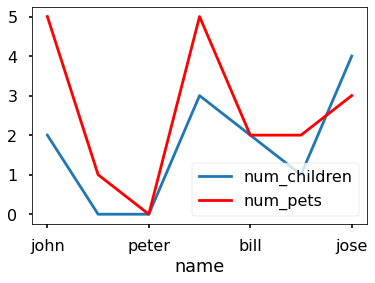

In [10]:
# gca stands for 'get current axis'
ax = plt.gca()

df.plot(kind='line',x='name',y='num_children',ax=ax)
df.plot(kind='line',x='name',y='num_pets', color='red',ax=ax)

plt.show()

### Bar plot

In [11]:
rng = np.random.RandomState(42)
df2 = pd.DataFrame(rng.randint(0,20, (5,4)), columns=['a', 'b', 'c', 'd'], 
                   index=['2001','2002','2003','2004','2005'])

In [12]:
df2.head(5)

,a,b,c,d
2001,6,19,14,10
2002,7,6,18,10
2003,10,3,7,2
2004,1,11,5,1
2005,0,11,11,16


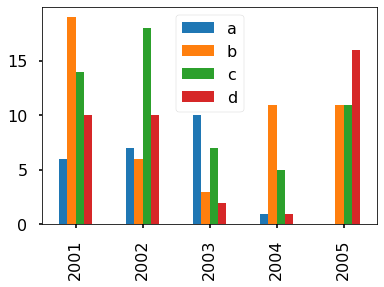

In [13]:
df2.plot.bar();

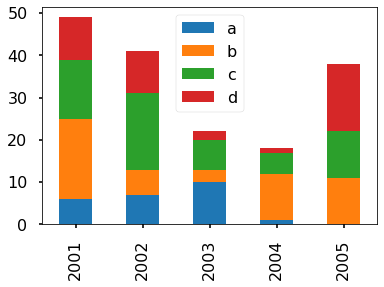

In [14]:
df2.plot.bar(stacked=True);

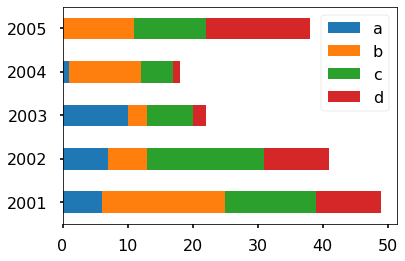

In [15]:
df2.plot.barh(stacked=True);

In [36]:
df3 = df.groupby('state')['name'].nunique()

In [37]:
df3.head()

state
california    3
dc            2
texas         2
Name: name, dtype: int64

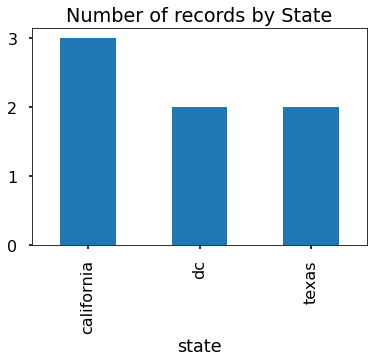

In [38]:
# add title
plt.title('Number of records by State')

df3.plot(kind='bar');

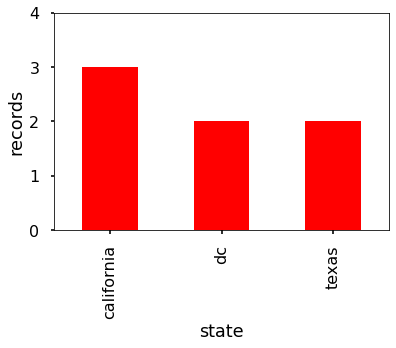

In [19]:
# add y-axis label
plt.ylabel('records')
plt.ylim(0,4)

df3.plot(kind='bar', color='red');

### Pie plot

In [20]:
np.random.seed(123456)
ss = pd.Series(3 * np.random.rand(4),
                    index=['a', 'b', 'c', 'd'], name='series')

In [21]:
ss.head()

a    0.380909
b    2.900154
c    0.781428
d    2.691710
Name: series, dtype: float64

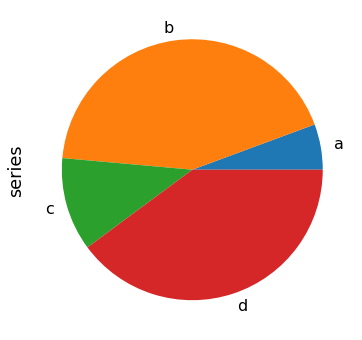

In [42]:
ss.plot.pie(figsize=(6, 6));

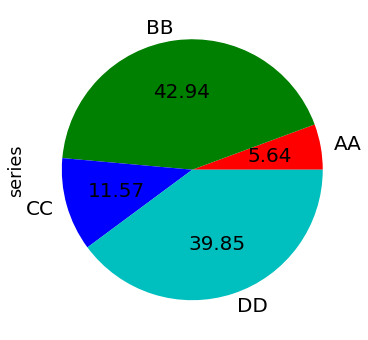

In [23]:
ss.plot.pie(labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'],
                   autopct='%.2f', fontsize=20, figsize=(6, 6));

In [24]:
raw_data = {'class_name': ['AIEN', 'BDSE', 'AIOT', 'SESE'],
            'Q1': [28, 24, 32, 18],
            'Q2': [25, 36, 20, 16],
            'Q3': [30, 34, 25, 23]}
cdf = pd.DataFrame(raw_data)
cdf

,class_name,Q1,Q2,Q3
0,AIEN,28,25,30
1,BDSE,24,36,34
2,AIOT,32,20,25
3,SESE,18,16,23


In [25]:
# Create a column with the total amount for each class
cdf['amt'] = cdf['Q1'] + cdf['Q2'] + cdf['Q3']
cdf[['class_name','amt']]

,class_name,amt
0,AIEN,83
1,BDSE,94
2,AIOT,77
3,SESE,57


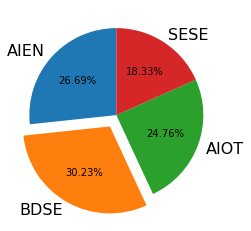

In [67]:
# Create pie chart
plt.pie(
    # using amt data
    cdf['amt'],
    # with the class name labels 
    labels=cdf['class_name'],
    # with one slide exploded out
    explode=(0, 0.15, 0, 0),
    # with the start angle at 90%
    startangle=90,
    # with the percent listed as a fraction
    autopct='%.2f%%'
    );

### Matplotlib Help

In [43]:
plt.pie?

## Lab

<b>有一個 DataFrame 如下</b>

In [28]:
np.random.seed(70)
data = pd.DataFrame(np.random.randint(50, size=(6, 4)),
        index=['one', 'two', 'three', 'four', 'five', 'six'],
        columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
data

Genus,A,B,C,D
one,14,22,24,0
two,21,46,20,39
three,8,32,23,33
four,20,1,16,15
five,41,13,26,21
six,47,34,15,10


<b>利用 'A'、'C' 兩欄的資料繪製線型圖</b>

<b>利用 'B'、'C'、'D' 三欄的資料做水平直條圖</b>

<b>使用 'C' 欄資料建立圓餅圖，不要顯示 Y 軸標題，顯示圖表標題 "C data"，顯示各區塊的百分比</b>